In [3]:
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [21]:
import matplotlib.pyplot as plt

In [ ]:
def choose_scaler(X):

    skewness = X.apply(lambda x: skew(x.dropna()))

    # if skewnes is between 1 and -1 there is normal distribution
    if abs(skewness).max() < 1:

        scaler = StandardScaler()
    else:

        scaler = MinMaxScaler()
    
    return scaler


In [11]:
def remove_percentage_and_convert_column(df, column_name):
    df[column_name] = df[column_name].replace({'%': ''}, regex=True).astype(float) / 100
    return df

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("listings.csv", encoding="utf-8")


In [24]:

print(df.head())

       id                          listing_url       scrape_id last_scraped  \
0   23163   https://www.airbnb.com/rooms/23163  20250316041547   2025-03-16   
1   23169   https://www.airbnb.com/rooms/23169  20250316041547   2025-03-16   
2   26755   https://www.airbnb.com/rooms/26755  20250316041547   2025-03-16   
3  782440  https://www.airbnb.com/rooms/782440  20250316041547   2025-03-16   
4  782489  https://www.airbnb.com/rooms/782489  20250316041547   2025-03-16   

        source                                 name  \
0  city scrape         Residence Karolina - KAROL12   
1  city scrape           Residence Masna - Masna302   
2  city scrape    Central Prague Old Town Top Floor   
3  city scrape  Central,Cheap&Lovely Miniapartment2   
4  city scrape  Central,Cheap&Lovely Miniapartment3   

                                         description  \
0  Unique and elegant apartment rental in Prague,...   
1  Masna studio offers a lot of space and privacy...   
2  Big and beautiful new a

In [17]:
df["price"] = df["price"].replace(r"[\$,]", "", regex=True).astype(float)

In [7]:
print(df.describe(include="all"))

                  id                         listing_url     scrape_id  \
count   1.010800e+04                               10108  1.010800e+04   
unique           NaN                               10108           NaN   
top              NaN  https://www.airbnb.com/rooms/23163           NaN   
freq             NaN                                   1           NaN   
mean    6.108089e+17                                 NaN  2.025032e+13   
std     5.380318e+17                                 NaN  3.906443e-03   
min     2.316300e+04                                 NaN  2.025032e+13   
25%     3.280956e+07                                 NaN  2.025032e+13   
50%     7.446005e+17                                 NaN  2.025032e+13   
75%     1.128376e+18                                 NaN  2.025032e+13   
max     1.376688e+18                                 NaN  2.025032e+13   

       last_scraped       source                              name  \
count         10108        10108         

In [ ]:
df.drop_duplicates()

In [11]:
df["price"].describe()

count      8808.000000
mean       2730.524977
std        8349.628162
min         223.000000
25%        1242.750000
50%        1762.000000
75%        2641.000000
max      251025.000000
Name: price, dtype: float64

/var/folders/c2/5t4vwc1n1jdcwd15x4d_69cm0000gn/T/ipykernel_12689/3829254354.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


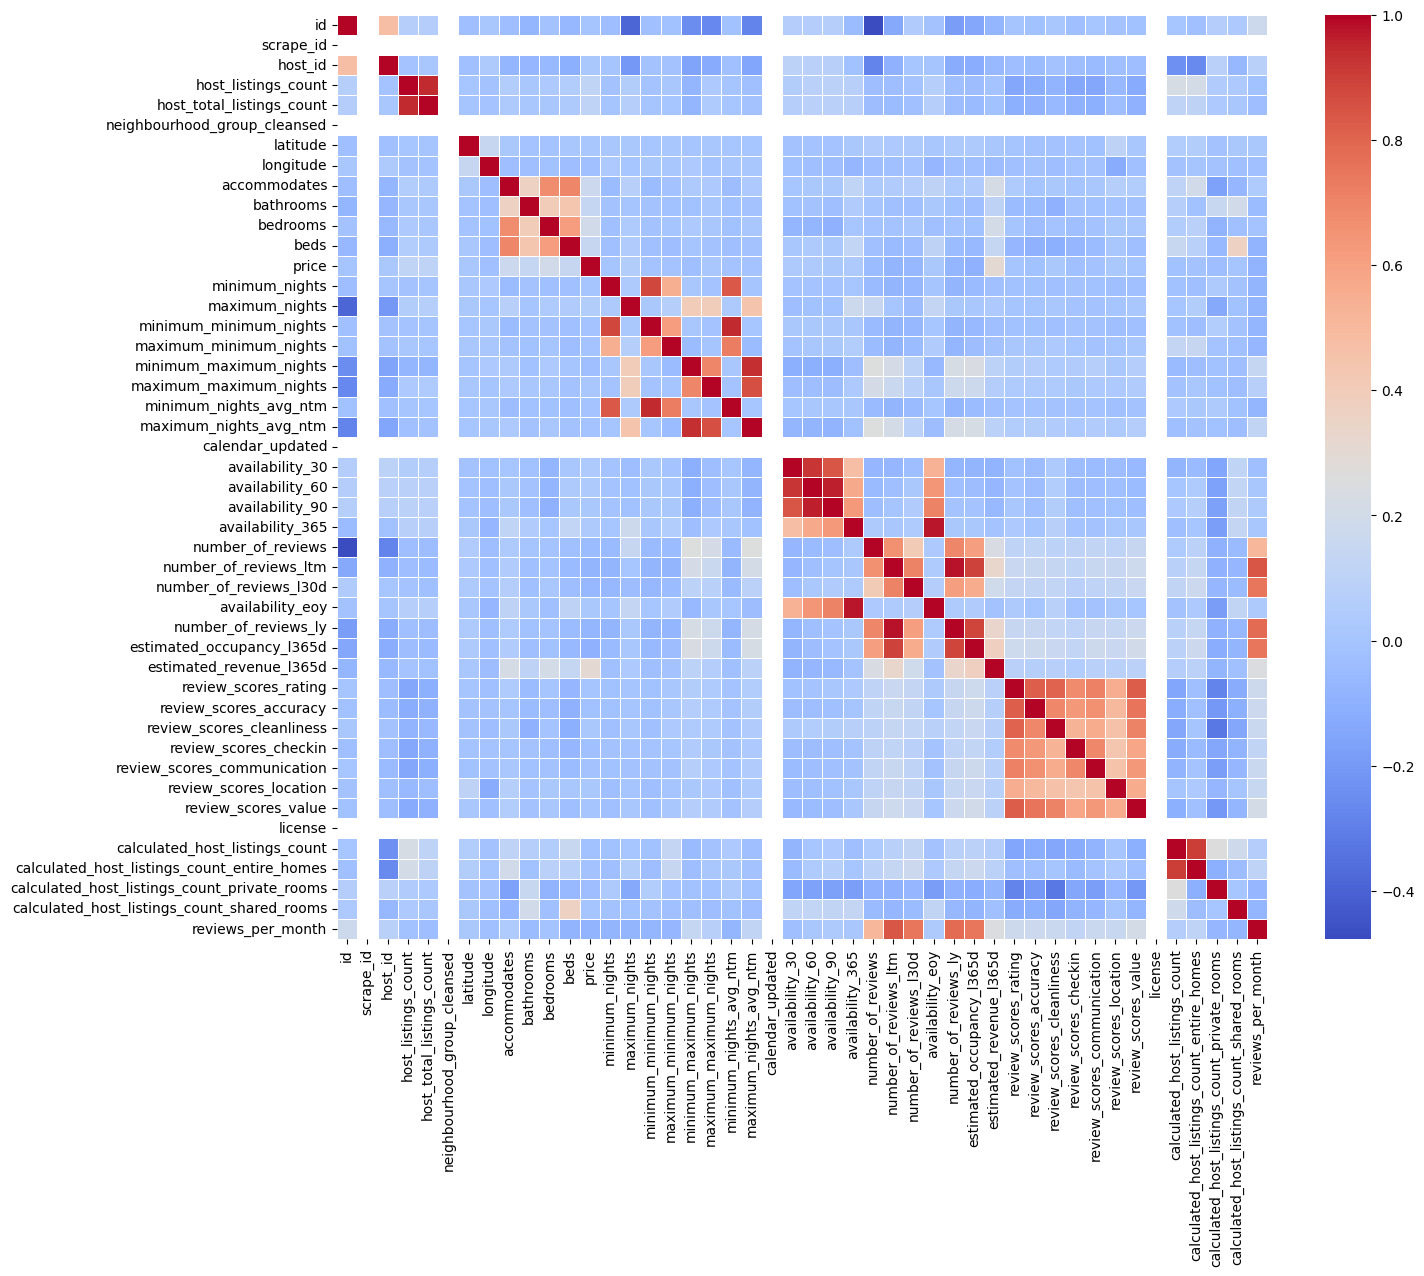

In [22]:
import seaborn as sns

# Korelační matice
corr_matrix = df.corr()

# Velikost grafu
plt.figure(figsize=(15, 12))

# Vykreslení heatmapy
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Zobrazení grafu
plt.show()

In [ ]:
drop_cols = [ "id", "name", "description", "license", "host_id", "host_name", "host_about", "neighborhood_overview"
             , "first_review", "last_review", "host_picture_url", "listing_url", "calendar_updated", "scrape_id", "last_scraped", "host_thumbnail_url", "neighbourhood"
    ]

In [ ]:
#could make new columns from this column for instance: coffee machine 1/0
transform_columns = ["amenities"]

In [ ]:
#host_thumbnail_url possibly getting user?
# "host_verifications", "host_has_profile_pic", host_identity_verified, has_availability, "instant_bookable"  binary
cat_columns = [ "host_url", "host_is_superhost", "host_verifications", "host_has_profile_pic", "host_identity_verified", "neighbourhood_cleansed" " property_type", "room_type", "bathrooms_text", "has_availability", "instant_bookable"
    ]

In [ ]:
#probably drop, depends on final predictions table, could encode with sin and cos
date_col = ["host_since"]

In [9]:
#needs to be transformed to integer
perc_col = ["host_response_rate", "host_acceptance_rate"]

In [37]:
df = df.drop(columns = drop_cols, axis = 1)

In [38]:
#"host_location" locations that are not in Prague, filtering out?
df["host_location"]

0                                  Prague, Czechia
1                                  Prague, Czechia
2                                  Prague, Czechia
3                                  Prague, Czechia
4                                  Prague, Czechia
5                                  Prague, Czechia
6                                  Prague, Czechia
7                                  Prague, Czechia
8                                  Prague, Czechia
9                                  Prague, Czechia
10                                 Prague, Czechia
11                                 Prague, Czechia
12                                 Prague, Czechia
13                       Saint Moritz, Switzerland
14                                 Prague, Czechia
15                                 Prague, Czechia
16                                 Prague, Czechia
17                                 Prague, Czechia
18                                 Prague, Czechia
19                             

In [41]:
df["neighbourhood"]

0                                                      NaN
1                                                      NaN
2                      Prague, Hlavní město Praha, Czechia
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                            Prague 1, Nove Mesto, Czechia
7                                          Prague, Czechia
8                                                      NaN
9                                                      NaN
10                                                     NaN
11                                                     NaN
12                                                     NaN
13                                                     NaN
14                     Prague, Hlavní město Praha, Czechia
15                     Prague, Hlavní město Praha, Czechia
16                     Prague, Hlavní město Praha, Czech

In [6]:
#could include more old prices since its previous scrape
df["host_response_rate"]

0        100%
1        100%
2        100%
3        100%
4        100%
5        100%
6        100%
7        100%
8        100%
9        100%
10       100%
11       100%
12       100%
13       100%
14       100%
15       100%
16       100%
17       100%
18       100%
19       100%
20       100%
21       100%
22       100%
23       100%
24       100%
25       100%
26        NaN
27       100%
28       100%
29       100%
30       100%
31       100%
32       100%
33       100%
34       100%
35       100%
36       100%
37       100%
38        NaN
39       100%
40       100%
41       100%
42       100%
43       100%
44       100%
45       100%
46       100%
47       100%
48        NaN
49       100%
50       100%
51       100%
52       100%
53       100%
54       100%
55       100%
56       100%
57         0%
58       100%
59       100%
60        NaN
61       100%
62       100%
63       100%
64       100%
65       100%
66        NaN
67       100%
68       100%
69        41%
70        41%
71    

In [12]:
for column in perc_col:
    df = remove_percentage_and_convert_column(df, column)

In [18]:
#new possible columns
new_columns =["Coffee maker","Dishwasher","Bed linens", "Pets allowed", "Free parking on premises", "Waterfront", "Wine glasses"]

df["amenities"]


0        ["Coffee maker", "Dishwasher", "Bed linens", "...
1        ["Patio or balcony", "Coffee maker", "Bed line...
2        ["AC - split type ductless system", "Coffee ma...
3        ["Coffee maker", "Bed linens", "Dishes and sil...
4        ["Coffee maker", "Bed linens", "Dishes and sil...
5        ["Coffee maker", "Bed linens", "Dishes and sil...
6        ["Coffee maker", "Bosch stainless steel induct...
7        ["Building staff", "Ethernet connection", "Win...
8        ["Coffee maker", "Dishwasher", "Bed linens", "...
9        ["Coffee maker", "Dishwasher", "Bed linens", "...
10       ["Coffee maker", "Dishwasher", "Bed linens", "...
11       ["Coffee maker", "Dishwasher", "Bed linens", "...
12       ["Coffee maker", "Dishwasher", "Bed linens", "...
13       ["Coffee maker", "Ethernet connection", "Bed l...
14       ["Coffee maker", "Bed linens", "Dishes and sil...
15       ["Bed linens", "Pets allowed", "Shampoo", "Hea...
16       ["Bed linens", "Pets allowed", "Shampoo", "Hea.